## 데이터셋 설명
>* Alcohol : 도수
>* Malic_Acid 
>* Ash
>* Ash_Alcanity
>* Magnesium
>* Total_Phenols
>* Flavanoids
>* Nonflavanoid_Phenols
>* Proanthocyanins
>* Color_Intensity : 색의 강도
>* Hue : 색상
>* OD280
>* Proline
>* Customer_Segment : 소비자 분류 (1,2,3)

따로 설명을 적지 않은 변수는 화학물질 입니다.``

출처: https://www.kaggle.com/sadeghjalalian/wine-customer-segmentation

# *와인 성질으로 소비자 분류하기

데이터의 Customer_Segment를 모른다고 가정할 때,     
PCA 와 Clustering 을 이용해 소비자를 분류해봅시다. 

## PCA를 위한 데이터 전처리를 해주세요

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [2]:
x = df.drop('Customer_Segment', axis =1)
y = df['Customer_Segment']

In [6]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns = x.columns
x_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## 몇개의 주성분이 적당할까요?

In [7]:
from sklearn.decomposition import PCA

# PCA
pca = PCA().fit(x_scaled)

# 몇개의 주성분이 적당할까? 
print('explaine variance ratio : ', pca.explained_variance_ratio_)
# PCA().fit(x_scaled).explained_variance_ratio_ 와 같음
print('cumulative variance : ', np.cumsum(pca.explained_variance_ratio_)) 

explaine variance ratio :  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
cumulative variance :  [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


> 7번째 주성분에서 89.3%가 설명 가능하고, 그 이후로는 각 성분의 설명력이 급격하게 감소하기 때문에 7개의 주성분으로 PCA를 진행한다.

## PCA 를 진행해봅시다. 

In [8]:
#7개의 주성분으로 PCA
pca = PCA(n_components=7)

x_pca=pca.fit_transform(x_scaled)

print(x_pca.shape)

(178, 7)


In [10]:
pca_columns=['pca_component_{}'.format(i) for i in range(1,8)]
wine_pca = pd.DataFrame(x_pca,columns=pca_columns)
wine_pca['target']= y
wine_pca.head()

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,1


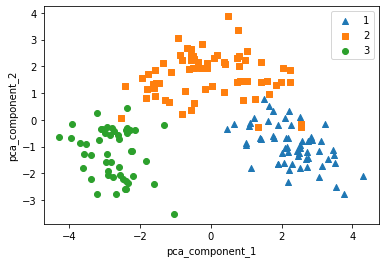

In [31]:
#2개의 주성분으로 확인
# segment1을 세모, segment2를 네모, segment3을 동그라미로 표시
markers=['^', 's', 'o']

# pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = wine_pca[wine_pca['target']==i+1]['pca_component_1']
    y_axis_data = wine_pca[wine_pca['target']==i+1]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=i+1)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

> 분류가 어느정도 잘 된 것을 볼 수 있다. 

## 주성분의 loadings를 찾아봅시다.
세션에서는 다루지 않았던 내용입니다. 구글링해서 도전해보세요!
>* loadings: coefficients of the linear combinations

In [32]:
loadings = pd.DataFrame(pca.components_.T, columns=pca_columns, index = x_scaled.columns)
loadings

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396
Malic_Acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171
Ash_Alcanity,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969
Magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883
Total_Phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685
Nonflavanoid_Phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447
Proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139
Color_Intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712


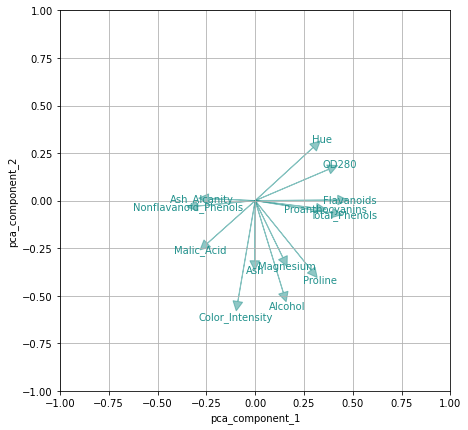

In [33]:
def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.05, head_length = 0.05, color = '#21918C',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = '#21918C', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel('pca_component_1')
    plt.ylabel('pca_component_2')
    plt.grid()

fig, ax = plt.subplots(figsize = (7,7))
loading_plot(pca.components_.T, x_scaled.columns)

In [34]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# for the dimension of the matrix look at the picture above

loading_matrix = pd.DataFrame(loadings, columns=pca_columns, index=x_scaled.columns)
loading_matrix

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7
Alcohol,0.313977,-0.766413,-0.250087,-0.017166,-0.246087,-0.171534,-0.041982
Malic_Acid,-0.533385,-0.356434,0.107342,0.516132,0.032619,-0.431220,0.313041
Ash,-0.004462,-0.500855,0.755176,-0.205895,-0.132486,-0.124089,-0.111044
Ash_Alcanity,-0.520622,0.016782,0.738120,0.058506,0.061232,0.080992,-0.213622
Magnesium,0.308892,-0.474812,0.157682,-0.338195,0.673472,-0.030641,0.240357
Total_Phenols,0.858552,-0.103064,0.176280,0.190410,-0.138315,0.067575,-0.020788
Flavanoids,0.920058,0.005324,0.181710,0.146406,-0.100992,0.015198,-0.045174
Nonflavanoid_Phenols,-0.649434,-0.045605,0.205450,-0.195440,-0.463806,0.207727,0.443255
Proanthocyanins,0.681840,-0.062279,0.180230,0.383627,0.126775,0.428795,0.277023
Color_Intensity,-0.192778,-0.839852,-0.165580,0.063377,-0.070804,0.336295,-0.169510
